In [11]:
import torch
import numpy as np
from dptb.plugins.init_nnsk import InitSKModel
from dptb.nnops.NN2HRK import NN2HRK
from dptb.nnops.apihost import NNSKHost
from ase.io import read,write
from dptb.structure.structure import BaseStruct
import matplotlib.pyplot as plt
from dptb.postprocess.bandstructure.band import bandcalc
import pickle as pickle
from dptb.dataprocess.processor import Processor

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [12]:
checkfile = './nnsk.json'
config='./input_short.json'

nnskapi = NNSKHost(checkpoint=checkfile, config=config)
nnskapi.register_plugin(InitSKModel())
nnskapi.build()
# define nnHrk for Hamiltonian model.
nnHrk = NN2HRK(apihost=nnskapi, mode='nnsk')

# set the input parameters for band structure calculation.
# structure: the path of the structure file.
run_opt={"structure":"./C_chain.vasp",
        "results_path":"./"}
# jdata: the input parameters for band structure calculation.

jdata={"kline_type":"abacus",
        "kpath":[[0.0000000000,  0.0000000000,   0.0000000000,   50],   
                 [0.0000000000,   0.0000000000,   0.5000000000,   1]
                ],
        "nkpoints":51,
        "klabels":["G","X"],
        "emin":-23,
        "emax":12
        }
# call bandcalc to calculate the band structure.
bcalc = bandcalc(apiHrk=nnHrk,run_opt=run_opt,jdata=jdata)
eigenstatus = bcalc.get_bands()

# initial rotate H or S func.


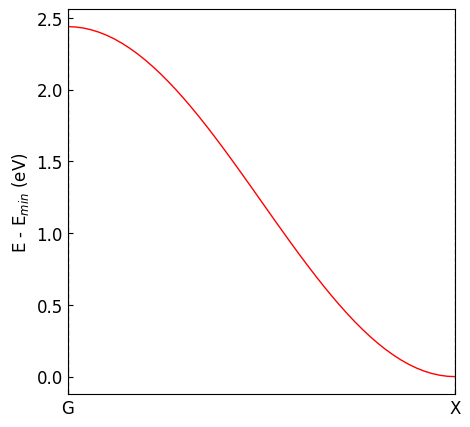

In [13]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(eigenstatus['xlist'], eigenstatus['eigenvalues']- np.min(eigenstatus['eigenvalues']), 'r-',lw=1)

#plt.ylim(-1,35)
for ii in eigenstatus['high_sym_kpoints']:
    plt.axvline(ii,color='gray',lw=1,ls='--')
plt.tick_params(direction='in')

plt.xlim(eigenstatus['xlist'].min(),eigenstatus['xlist'].max())

plt.ylabel('E - E$_{min}$ (eV)',fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(eigenstatus['high_sym_kpoints'], eigenstatus['labels'], fontsize=12)
plt.show()